In [176]:
# Python library  to access financial data from Yahoo Finance
import pandas as  pd
import yfinance as yf
import matplotlib.pyplot as plt

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [178]:
#Bitcoin
bitcoin_ticker_temp = yf.Ticker("BTC-USD")
bitcoin_ticker_temp

yfinance.Ticker object <BTC-USD>

In [179]:
bitcoin_ticker = bitcoin_ticker_temp.history(period= "max")
bitcoin_ticker

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-02 00:00:00+00:00,44187.140625,45899.707031,44176.949219,44957.968750,39335274536,0.0,0.0
2024-01-03 00:00:00+00:00,44961.601562,45503.242188,40813.535156,42848.175781,46342323118,0.0,0.0
2024-01-04 00:00:00+00:00,42855.816406,44770.023438,42675.175781,44179.921875,30448091210,0.0,0.0


In [180]:
type(bitcoin_ticker), bitcoin_ticker.shape, bitcoin_ticker.dtypes

(pandas.core.frame.DataFrame,
 (3399, 7),
 Open            float64
 High            float64
 Low             float64
 Close           float64
 Volume            int64
 Dividends       float64
 Stock Splits    float64
 dtype: object)

In [181]:
index=bitcoin_ticker.index
index

DatetimeIndex(['2014-09-17 00:00:00+00:00', '2014-09-18 00:00:00+00:00',
               '2014-09-19 00:00:00+00:00', '2014-09-20 00:00:00+00:00',
               '2014-09-21 00:00:00+00:00', '2014-09-22 00:00:00+00:00',
               '2014-09-23 00:00:00+00:00', '2014-09-24 00:00:00+00:00',
               '2014-09-25 00:00:00+00:00', '2014-09-26 00:00:00+00:00',
               ...
               '2023-12-28 00:00:00+00:00', '2023-12-29 00:00:00+00:00',
               '2023-12-30 00:00:00+00:00', '2023-12-31 00:00:00+00:00',
               '2024-01-01 00:00:00+00:00', '2024-01-02 00:00:00+00:00',
               '2024-01-03 00:00:00+00:00', '2024-01-04 00:00:00+00:00',
               '2024-01-05 00:00:00+00:00', '2024-01-06 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3399, freq=None)

In [182]:
columns=bitcoin_ticker.columns
columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [183]:
y=bitcoin_ticker["Close"]
y

Date
2014-09-17 00:00:00+00:00      457.334015
2014-09-18 00:00:00+00:00      424.440002
2014-09-19 00:00:00+00:00      394.795990
2014-09-20 00:00:00+00:00      408.903992
2014-09-21 00:00:00+00:00      398.821014
                                 ...     
2024-01-02 00:00:00+00:00    44957.968750
2024-01-03 00:00:00+00:00    42848.175781
2024-01-04 00:00:00+00:00    44179.921875
2024-01-05 00:00:00+00:00    44162.691406
2024-01-06 00:00:00+00:00    43732.027344
Name: Close, Length: 3399, dtype: float64

Text(0.5, 1.0, 'Bitcoin Price')

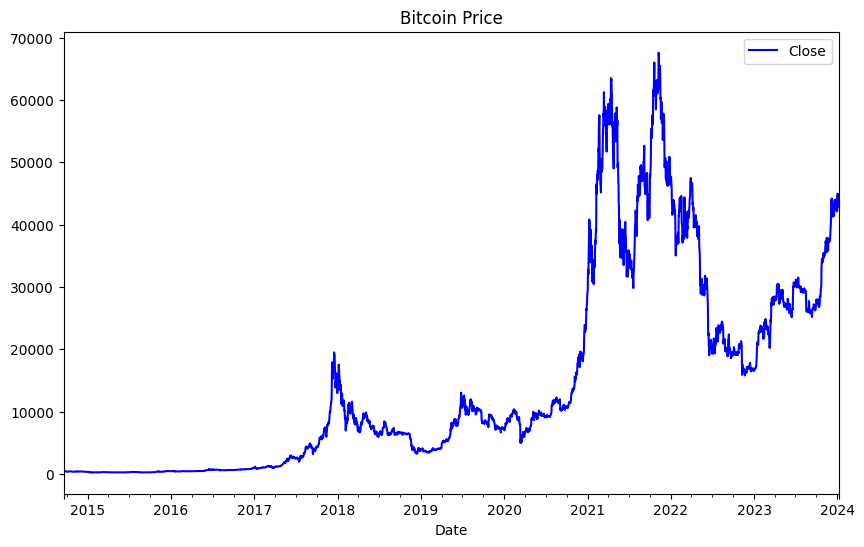

In [184]:
bitcoin_ticker.plot(y=["Close"], use_index = True, style='b-', figsize=(10, 6))
plt.title("Bitcoin Price")

# Data Preprocessing

In [185]:
bitcoin_ticker.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [186]:
bitcoin_ticker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3399 entries, 2014-09-17 00:00:00+00:00 to 2024-01-06 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3399 non-null   float64
 1   High          3399 non-null   float64
 2   Low           3399 non-null   float64
 3   Close         3399 non-null   float64
 4   Volume        3399 non-null   int64  
 5   Dividends     3399 non-null   float64
 6   Stock Splits  3399 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 212.4 KB


In [187]:
bitcoin_ticker.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3399.000000,3399.000000,3399.000000,3399.000000,3.399000e+03,3399.0,3399.0
mean,14623.628052,14965.554282,14255.630014,14635.017063,1.657556e+10,0.0,0.0
std,16219.066822,16608.185105,15783.328575,16221.943183,1.908233e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,915.801514,924.028015,899.312012,919.622986,1.588645e+08,0.0,0.0
50%,8246.849609,8414.227539,8071.120605,8250.969727,1.156880e+10,0.0,0.0
75%,23853.489258,24409.812500,23462.214844,23876.561523,2.692564e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


In [188]:
bitcoin_ticker=bitcoin_ticker.drop(["Dividends"], axis=1)

In [189]:
bitcoin_ticker=bitcoin_ticker.drop(["Stock Splits"], axis=1)

In [190]:
bitcoin_ticker

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-01-02 00:00:00+00:00,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03 00:00:00+00:00,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04 00:00:00+00:00,42855.816406,44770.023438,42675.175781,44179.921875,30448091210


## Setting up our target variable for machine learning: 


### Create a new column 'Tomorrow' representing the closing prices of the next trading day by shifting the 'Close' prices upward.

In [191]:
bitcoin_ticker['Tomorrow'] = bitcoin_ticker['Close'].shift(-1)

In [192]:
bitcoin_ticker.head(1)

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,424.440002


In [193]:
bitcoin_ticker['Target'] = bitcoin_ticker['Tomorrow']>bitcoin_ticker['Close']
bitcoin_ticker.head(2)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,424.440002,False
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,394.795990,False


In [194]:
bitcoin_ticker['Target'] = (bitcoin_ticker['Tomorrow']>bitcoin_ticker['Close']).astype(int)
bitcoin_ticker.head(2)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,394.795990,0


In [195]:
type(bitcoin_ticker), bitcoin_ticker.shape, bitcoin_ticker.dtypes

(pandas.core.frame.DataFrame,
 (3399, 7),
 Open        float64
 High        float64
 Low         float64
 Close       float64
 Volume        int64
 Tomorrow    float64
 Target        int32
 dtype: object)

## Training an initial machine learning mode

In [196]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
model

RandomForestClassifier(min_samples_split=100, random_state=1)

In [197]:
bitcoin_train = bitcoin_ticker.iloc[:-100]
bitcoin_train.shape

(3299, 7)

In [198]:
bitcoin_test = bitcoin_ticker.iloc[-100:]
bitcoin_test.shape

(100, 7)

In [199]:
predictors=["Close", "Volume", "Open", "High", "Low" ]
predictors

['Close', 'Volume', 'Open', 'High', 'Low']

In [200]:
bitcoin_train[predictors].head(1)

,Close,Volume,Open,High,Low
Date,,,,,
2014-09-17 00:00:00+00:00,457.334015,21056800,465.864014,468.174011,452.421997


In [201]:
bitcoin_train["Target"].head(3)

Date
2014-09-17 00:00:00+00:00    0
2014-09-18 00:00:00+00:00    0
2014-09-19 00:00:00+00:00    1
Name: Target, dtype: int32

In [202]:
model.fit(bitcoin_train[predictors], bitcoin_train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [203]:
preds = model.predict(bitcoin_test[predictors])
preds

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [204]:
precision_score(bitcoin_test["Target"], preds)

0.5416666666666666

In [205]:
preds = pd.Series(preds, index=bitcoin_test.index, name="Predictions")
preds

Date
2023-09-29 00:00:00+00:00    1
2023-09-30 00:00:00+00:00    1
2023-10-01 00:00:00+00:00    0
2023-10-02 00:00:00+00:00    0
2023-10-03 00:00:00+00:00    0
                            ..
2024-01-02 00:00:00+00:00    1
2024-01-03 00:00:00+00:00    1
2024-01-04 00:00:00+00:00    0
2024-01-05 00:00:00+00:00    0
2024-01-06 00:00:00+00:00    0
Name: Predictions, Length: 100, dtype: int32

In [206]:
precision_score(bitcoin_test["Target"], preds)

0.5416666666666666

In [207]:
combined = pd.concat([bitcoin_test["Target"], preds], axis =1)
combined.head(5)

,Target,Predictions
Date,,
2023-09-29 00:00:00+00:00,1,1
2023-09-30 00:00:00+00:00,1,1
2023-10-01 00:00:00+00:00,0,0
2023-10-02 00:00:00+00:00,0,0
2023-10-03 00:00:00+00:00,1,0


<Axes: xlabel='Date'>

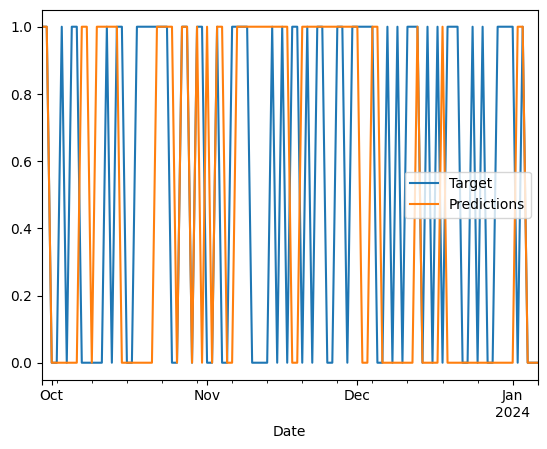

In [208]:
combined.plot()

## Building a Backtesting system

In [209]:
def predict(bitcoint_train, bitcoint_test, predictors, model):
    model.fit(bitcoint_train[predictors], bitcoint_train["Target"])
    preds = model.predict(bitcoint_test[predictors])
    preds = pd.Series(preds, index=bitcoint_test.index, name="Predictions")
    combined = pd.concat([bitcoint_test["Target"], preds], axis=1)
    return combined

In [210]:
bitcoin_ticker.shape

(3399, 7)

In [211]:
bitcoin_ticker.iloc[0:2500]

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,402.152008,1
...,...,...,...,...,...,...,...
2021-07-17 00:00:00+00:00,31397.308594,31935.945312,31223.990234,31533.068359,18895018942,31796.810547,1
2021-07-18 00:00:00+00:00,31533.884766,32398.996094,31215.492188,31796.810547,18787986667,30817.832031,0
2021-07-19 00:00:00+00:00,31800.011719,31885.859375,30563.734375,30817.832031,20434789545,29807.347656,0


In [212]:
for i in range(500, bitcoin_ticker.shape[0], 250):
    print(i)

500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250


In [213]:
def backtest(data, model, predictors, start=300, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(bitcoin_train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [214]:
predictions = backtest(bitcoin_ticker, model, predictors)
predictions

,Target,Predictions
Date,,
2015-07-14 00:00:00+00:00,0,0
2015-07-15 00:00:00+00:00,0,0
2015-07-16 00:00:00+00:00,1,1
2015-07-17 00:00:00+00:00,0,0
2015-07-18 00:00:00+00:00,0,1
...,...,...
2024-01-02 00:00:00+00:00,0,1
2024-01-03 00:00:00+00:00,1,1
2024-01-04 00:00:00+00:00,0,0


In [215]:
precision_score(predictions["Target"], predictions["Predictions"])

0.7293478260869565

In [ ]:
"""
Analysis of Results:
The precision scores obtained from both the single test set (precision_score(bitcoin_test["Target"], preds)) 
and the backtesting process (precision_score(predictions["Target"], predictions["Predictions"])) indicate
the model's ability to correctly classify positive instances (in this case, predicting an increase or decrease in the target).

"""